# COGS118B Final Project

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

import nltk
import re
import os

from sklearn import decomposition
from sklearn.feature_extraction.text import TfidfVectorizer

In [268]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics

In [61]:
import warnings
warnings.filterwarnings("ignore")

# EDA

In [62]:
fp_credits = os.path.join('data', 'tmdb_5000_credits.csv')
fp_movies = os.path.join('data', 'tmdb_5000_movies.csv')

In [63]:
credits = pd.read_csv(fp_credits)
credits.rename(columns = {'movie_id': 'id'}, inplace = True)

In [64]:
# Merge two dataset on their common id
movies = pd.read_csv(fp_movies)
df = movies.merge(credits, on = 'id')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Transfer columns of json types to string

In [65]:
df['genres'] = df['genres'].apply(json.loads)

In [66]:
for index,i in zip(df.index,df['genres']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name'])) # the key 'name' contains the name of the genre
    df.loc[index,'genres'] = str(list1)

In [67]:
df['keywords'] = df['keywords'].apply(json.loads)
for index,i in zip(df.index,df['keywords']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name'])) # the key 'name' contains the name of the keywords
    df.loc[index,'keywords'] = str(list1)

In [68]:
df['production_companies'] = df['production_companies'].apply(json.loads)
for index,i in zip(df.index,df['production_companies']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name'])) # the key 'name' contains the name of the production_companies
    df.loc[index,'production_companies'] = str(list1)

In [69]:
df['production_countries'] = df['production_countries'].apply(json.loads)
for index,i in zip(df.index,df['production_countries']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name'])) # the key 'name' contains the name of the production_countries
    df.loc[index,'production_countries'] = str(list1)

In [70]:
df['spoken_languages'] = df['spoken_languages'].apply(json.loads)
for index,i in zip(df.index,df['spoken_languages']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name'])) # the key 'name' contains the name of the spoken_languages
    df.loc[index,'spoken_languages'] = str(list1)

In [71]:
df['cast'] = df['cast'].apply(json.loads)
for index,i in zip(df.index,df['cast']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name'])) # the key 'name' contains the name of the cast
    df.loc[index,'cast'] = str(list1)

In [72]:
df['crew'] = df['crew'].apply(json.loads)

In [73]:
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']

In [74]:
df['crew'] = df['crew'].apply(director)
df.rename(columns={'crew':'director'},inplace=True)

In [75]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,director
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...",...,162.0,"['English', 'Español']",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",James Cameron
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",...,169.0,['English'],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",Gore Verbinski
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']",...,148.0,"['Français', 'English', 'Español', 'Italiano',...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",Sam Mendes
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",...,165.0,['English'],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",Christopher Nolan
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],...,132.0,['English'],Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",Andrew Stanton


In [76]:
# Remove "" contains in each string 
df['genres'] = df['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['genres'] = df['genres'].str.split(',')


df['keywords'] = df['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
df['keywords'] = df['keywords'].str.split(',')

df['production_companies'] = df['production_companies'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
df['production_companies'] = df['production_companies'].str.split(',')

df['spoken_languages'] = df['spoken_languages'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
df['spoken_languages'] = df['spoken_languages'].str.split(',')

df['cast'] = df['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
df['cast'] = df['cast'].str.split(',')

In [77]:
#Save another table for future study
df1 = df

In [78]:
# Remove list values in columns
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: ' '.join(x))

In [79]:
# Remove list values in columns
df['genres'] = df['genres'].apply(lambda x: ' '.join(x))
df['keywords'] = df['keywords'].apply(lambda x: ' '.join(x))
df['cast'] = df['cast'].apply(lambda x: ' '.join(x))
df['production_companies'] = df['production_companies'].apply(lambda x: ' '.join(x))
df['synopsis'] = df['genres']+df['keywords']+df['cast']+df['director']+df['production_companies']

In [80]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,director,synopsis
0,237000000,Action Adventure Fantasy ScienceFiction,http://www.avatarmovie.com/,19995,cultureclash future spacewar spacecolony socie...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,IngeniousFilmPartners TwentiethCenturyFoxFilmC...,...,English Español,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,SamWorthington ZoeSaldana SigourneyWeaver Step...,James Cameron,Action Adventure Fantasy ScienceFictionculture...
1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drugabuse exoticisland eastindiatradingc...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,WaltDisneyPictures JerryBruckheimerFilms Secon...,...,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,JohnnyDepp OrlandoBloom KeiraKnightley Stellan...,Gore Verbinski,Adventure Fantasy Actionocean drugabuse exotic...
2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy basedonnovel secretagent sequel mi6 britis...,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,ColumbiaPictures Danjaq B24,...,Français English Español Italiano Deutsch,Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,DanielCraig ChristophWaltz LéaSeydoux RalphFie...,Sam Mendes,Action Adventure Crimespy basedonnovel secreta...
3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dccomics crimefighter terrorist secretidentity...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,LegendaryPictures WarnerBros. DCEntertainment ...,...,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,ChristianBale MichaelCaine GaryOldman AnneHath...,Christopher Nolan,Action Crime Drama Thrillerdccomics crimefight...
4,260000000,Action Adventure ScienceFiction,http://movies.disney.com/john-carter,49529,basedonnovel mars medallion spacetravel prince...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,WaltDisneyPictures,...,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,TaylorKitsch LynnCollins SamanthaMorton Willem...,Andrew Stanton,Action Adventure ScienceFictionbasedonnovel ma...


# Natural Language Processing

In [81]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [82]:
# Use nltk's English stopwords.
stopwords = nltk.corpus.stopwords.words('english')

print ("We use " + str(len(stopwords)) + " stop-words from nltk library.")
print (stopwords[:10])

We use 179 stop-words from nltk library.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [83]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [84]:
def tokenization_and_stemming(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word not in stopwords]  
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    # get all tokenized and stemmed results
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenization(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word not in stopwords]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    # get only tokenized results
    return filtered_tokens

In [270]:
tokenization(df.iloc[0]['overview'])

['in',
 '22nd',
 'century',
 'paraplegic',
 'marine',
 'dispatched',
 'moon',
 'pandora',
 'unique',
 'mission',
 'becomes',
 'torn',
 'following',
 'orders',
 'protecting',
 'alien',
 'civilization']

In [85]:
df['synopsis'] = df['synopsis'].fillna('')

In [86]:
tokenized_and_stemmed_results = df['synopsis'].apply(tokenization_and_stemming)
tokenized_and_stemmed_results

0       [action, adventur, fantasi, sciencefictioncult...
1       [adventur, fantasi, actionocean, drugabus, exo...
2       [action, adventur, crimespi, basedonnovel, sec...
3       [action, crime, drama, thrillerdccom, crimefig...
4       [action, adventur, sciencefictionbasedonnovel,...
                              ...                        
4798    [action, crime, thrillerunitedstates–mexicobar...
4799    [comedi, romanceedwardburn, kerrybishé, marsha...
4800    [comedi, drama, romanc, tvmovied, loveatfirsts...
4801    [danielhenney, elizacoup, billpaxton, alanruck...
4802    [documentaryobsess, camcord, crush, dreamgirld...
Name: synopsis, Length: 4803, dtype: object

In [87]:
tokenized_results = df['synopsis'].apply(tokenization)
tokenized_results

0       [action, adventure, fantasy, sciencefictioncul...
1       [adventure, fantasy, actionocean, drugabuse, e...
2       [action, adventure, crimespy, basedonnovel, se...
3       [action, crime, drama, thrillerdccomics, crime...
4       [action, adventure, sciencefictionbasedonnovel...
                              ...                        
4798    [action, crime, thrillerunitedstates–mexicobar...
4799    [comedy, romanceedwardburns, kerrybishé, marsh...
4800    [comedy, drama, romance, tvmoviedate, loveatfi...
4801    [danielhenney, elizacoupe, billpaxton, alanruc...
4802    [documentaryobsession, camcorder, crush, dream...
Name: synopsis, Length: 4803, dtype: object

In [88]:
# append tokenized and stemmed results into a doc list
docs_stemmed = []
for lst in tokenized_and_stemmed_results:
    for words in lst:
        docs_stemmed.append(words)

In [89]:
docs_stemmed.extend(docs_stemmed)

In [90]:
# append tokenized results into a doc list
docs_tokenized = []
for lst in tokenized_results:
    for words in lst:
        docs_tokenized.append(words)

In [91]:
docs_tokenized.extend(docs_tokenized)

In [92]:
#Create a mapping from stemmed words to original tokenized words for result interpretation.
vocab_frame_dict = {docs_stemmed[x]:docs_tokenized[x] for x in range(len(docs_stemmed))}

In [93]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
#tfidf = TfidfVectorizer(stop_words='english', tokenizer=tokenization_and_stemming)
tfidf_model = TfidfVectorizer(tokenizer=tokenization_and_stemming, stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf_model.fit_transform(df['synopsis'])


#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 80102)

In [94]:
print (tfidf_matrix)

  (0, 497)	0.029872005988968976
  (0, 980)	0.034820115420910375
  (0, 25037)	0.044577556988285263
  (0, 66393)	0.10386261193843443
  (0, 26946)	0.06731415343891697
  (0, 69405)	0.09906839610338722
  (0, 69380)	0.09087263000019807
  (0, 68986)	0.08904995373180266
  (0, 69404)	0.07498432229649553
  (0, 26953)	0.08483263236431404
  (0, 63623)	0.04735429822624881
  (0, 69375)	0.07265842152542437
  (0, 2354)	0.06165648905640203
  (0, 75484)	0.09302839846750317
  (0, 2372)	0.08747107973205615
  (0, 11834)	0.09087263000019807
  (0, 48181)	0.09566684583524528
  (0, 69063)	0.0696868819587726
  (0, 6735)	0.07145494385241011
  (0, 46343)	0.09566684583524528
  (0, 4786)	0.09906839610338722
  (0, 59660)	0.09566684583524528
  (0, 52420)	0.09302839846750317
  (0, 172)	0.09566684583524528
  (0, 79961)	0.0766368662611249
  :	:
  (4800, 7146)	0.27586242358445273
  (4800, 75770)	0.2892122309040634
  (4800, 59621)	0.2892122309040634
  (4800, 43412)	0.2892122309040634
  (4800, 17454)	0.2892122309040634
  (

In [95]:
tfidf_model.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': 'english',
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': <function __main__.tokenization_and_stemming(text)>,
 'use_idf': True,
 'vocabulary': None}

In [96]:
# Get all feature words from tf-idf selected words
tf_selected_words = tfidf_model.get_feature_names()
tf_selected_words

['1.85film',
 '1019entertain',
 '10thholeproduct',
 '10weststudio',
 '120dbfilm',
 '120film',
 '13ghostsproductionscanadainc',
 '1492pictur',
 '15thcenturi',
 '15thcenturytomhulc',
 '16blockproduct',
 '16thcenturi',
 '16thcenturyalpacino',
 '16thcenturytoshirōmifun',
 '17thcenturi',
 '17thcenturyanyataylor-joy',
 '1812product',
 '1821pictur',
 '18thcenturi',
 '18thcenturyf.murrayabraham',
 '18thcenturymarieféret',
 '1910schristopherreev',
 '1910sfernandamontenegro',
 '1910sgerardbutl',
 '1910skatewinslet',
 '1920s',
 '1930s',
 '1930schristopherwalken',
 '1930sglennford',
 '1930sjulieandrew',
 '1930skevincostn',
 '1930stomhank',
 '1930szacefron',
 '1940s',
 '1940sgérardjugnot',
 '1940smarlonbrando',
 '1940smelindadillon',
 '1940stimrobbin',
 '1940stomhank',
 '1950s',
 '1950simeldastaunton',
 '1950sleonardodicaprio',
 '1950sloganlerman',
 '1950ssaoirseronan',
 '1950ssteveguttenberg',
 '1950stomhardi',
 '1960s',
 '1960sclinteastwood',
 '1960scolinfirth',
 '1960sdianelan',
 '1960sevanrache

In [97]:
from sklearn.metrics.pairwise import cosine_similarity
cos_matrix = cosine_similarity(tfidf_matrix)
print (cos_matrix)

[[1.         0.00488796 0.00221244 ... 0.00624419 0.         0.        ]
 [0.00488796 1.         0.01267361 ... 0.         0.         0.        ]
 [0.00221244 0.01267361 1.         ... 0.         0.         0.        ]
 ...
 [0.00624419 0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


# k-means

In [111]:
from sklearn.cluster import KMeans

# Manually using number of cluster as 5 due to a large dataset
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

In [112]:
# add a new column cluster
df['cluster'] = clusters

In [113]:
df['cluster'].value_counts()

4    2132
1    1902
2     358
3     226
0     185
Name: cluster, dtype: int64

In [114]:
#km.cluster_centers_ denotes the importances of each items in centroid.
#We need to sort it in decreasing-order and get the top k items.
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

In [115]:
Cluster_keywords_summary = {}
for i in range(num_clusters):
    print("Cluster" + str(i) + " words:")
    Cluster_keywords_summary[i] = []
    for ind in order_centroids[i, :10]: #replace 10 with n words per cluster
        Cluster_keywords_summary[i].append(vocab_frame_dict[tf_selected_words[ind]])
        print (vocab_frame_dict[tf_selected_words[ind]] + ",")
    print
    # Print out the toppest 10 movie titles in each cluster
    cluster_movies = df.loc[df['cluster'] == i]['original_title'].values.tolist()
    print ("Cluster " + str(i) + " movie titles (" + str(len(cluster_movies)) + " movies): ")
    print (", ".join(cluster_movies[:10]))
    print ("\n")

Cluster0 words:
independentfilm,
comedy,
drama,
crime,
sex,
murder,
nudity,
violence,
drug,
action,
Cluster 0 movie titles (185 movies): 
Mystery Men, There Be Dragons, The Tree of Life, Barney's Version, The Good Thief, Taking Woodstock, What Just Happened, Stealing Harvard, Lords of Dogtown, The World's Fastest Indian


Cluster1 words:
drama,
action,
crime,
thriller,
adventure,
mystery,
sciencefiction,
warnerbros,
history,
murder,
Cluster 1 movie titles (1902 movies): 
Avatar, Spectre, The Dark Knight Rises, John Carter, Spider-Man 3, Avengers: Age of Ultron, Batman v Superman: Dawn of Justice, Superman Returns, Quantum of Solace, The Lone Ranger


Cluster2 words:
horror,
mystery,
thriller,
murder,
slasher,
drama,
zombie,
serialkiller,
violence,
sciencefiction,
Cluster 2 movie titles (358 movies): 
World War Z, The Wolfman, End of Days, What Lies Beneath, Creepshow, The Haunting, Exorcist: The Beginning, Carriers, Dreamcatcher, Blade: Trinity


Cluster3 words:
animation,
family,
adve

In [116]:
Cluster_keywords_summary

{0: ['independentfilm',
  'comedy',
  'drama',
  'crime',
  'sex',
  'murder',
  'nudity',
  'violence',
  'drug',
  'action'],
 1: ['drama',
  'action',
  'crime',
  'thriller',
  'adventure',
  'mystery',
  'sciencefiction',
  'warnerbros',
  'history',
  'murder'],
 2: ['horror',
  'mystery',
  'thriller',
  'murder',
  'slasher',
  'drama',
  'zombie',
  'serialkiller',
  'violence',
  'sciencefiction'],
 3: ['animation',
  'family',
  'adventure',
  'comedy',
  'fantasy',
  'duringcreditsstinger',
  'dreamworksanimation',
  'aftercreditsstinger',
  'frankwelker',
  'jimcummings'],
 4: ['comedy',
  'drama',
  'romance',
  'family',
  'music',
  'adventure',
  'fantasy',
  'warnerbros',
  'sport',
  'mgm']}

In [119]:
pca = decomposition.PCA(n_components=2)
tfidf_matrix_np=tfidf_matrix.toarray()
pca.fit(tfidf_matrix_np)
X = pca.transform(tfidf_matrix_np)
X_df =pd.DataFrame(X)

In [120]:
xs, ys = X[:, 0], X[:, 1]

#PCA is to transferm the multiple dimension into twi dimension

#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}
#set up cluster names using a dict
cluster_names = {}
for i in range(num_clusters):
    cluster_names[i] = ", ".join(Cluster_keywords_summary[i])

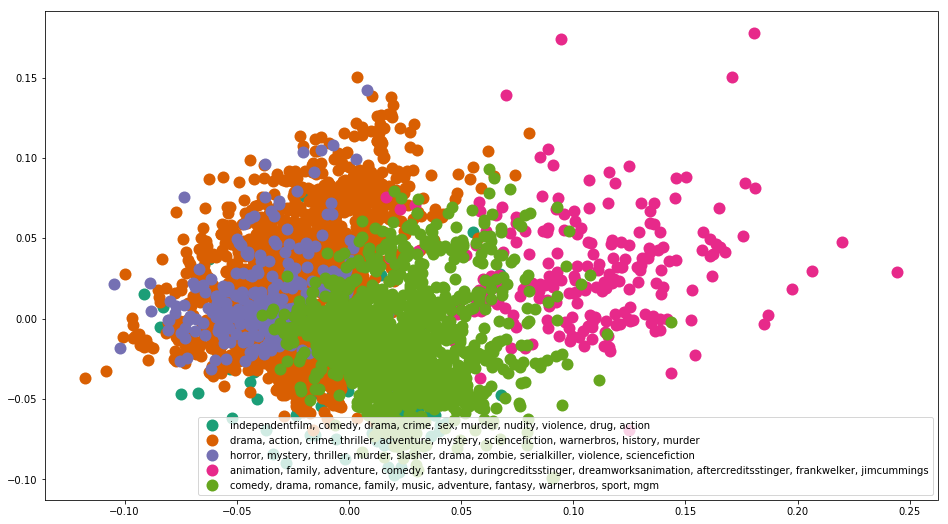

In [121]:
%matplotlib inline 

#create data frame with PCA cluster results
dfv= pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=df['original_title'])) 
groups = dfv.groupby(clusters)

# set up plot
fig, ax = plt.subplots(figsize=(16, 9))
#Set color for each cluster/group
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')

ax.legend(numpoints=1,loc=4)  #show legend with only 1 point, position is right bottom.

plt.show() #show the plot

In [123]:
from sklearn.model_selection import train_test_split

In [126]:
train_x,test_x,train_y,test_y = train_test_split(X_df,df.popularity,test_size = 0.3)
# TF-IDF Model
rf_pipe =Pipeline(steps=[('model',LinearRegression())])
rf_pipe.fit(train_x,train_y)
predictions= rf_pipe.predict(test_x)

In [127]:
#R^2 Score
rf_pipe.score(test_x, test_y)

0.053907466952523464

In [128]:
# K Means Cluster
KX = km.fit_transform(tfidf_matrix)

In [129]:
KX_df = pd.DataFrame(KX)
KX_df.head()

,0,1,2,3,4
0,0.999237,0.997885,0.999904,1.004551,1.003577
1,1.001736,0.995484,0.999829,1.004854,1.003929
2,1.000808,0.999176,1.000555,1.004728,1.004420
3,0.999550,1.001743,0.999694,0.998290,1.003627
4,0.998702,0.996165,1.000158,1.004058,1.003744


In [130]:
train_x,test_x,train_y,test_y = train_test_split(KX_df,df.popularity,test_size = 0.3)
rf_pipe =Pipeline(steps=[('model',LinearRegression())])
rf_pipe.fit(train_x,train_y)
predictions= rf_pipe.predict(test_x)

In [131]:
#R^2 Score
rf_pipe.score(test_x, test_y)

0.06816977674636349

## Model Selection

In [132]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'director', 'synopsis', 'cluster'],
      dtype='object')

In [179]:
C= df['vote_average'].mean()
m= df['vote_count'].quantile(0.9)

1838.4000000000015

In [182]:
v = df['vote_count']
R = df['vote_average']
df['weighted_score'] = (v/(v+m) * R) + (m/(m+v) * C)

In [184]:
X = df1[['budget', 'genres', 'original_language', 'vote_average', 'runtime', 
         'spoken_languages', 'status', 'production_companies', 'vote_count','keywords', 'cast', 'director', 'weighted_score']]
y = df1['popularity']

In [185]:
X['genres'] = X['genres'].apply(lambda x: x.split())
X['cast'] = X['cast'].apply(lambda x: x.split())
X['keywords'] = X['keywords'].apply(lambda x: x.split())
X['production_companies'] = X['production_companies'].apply(lambda x: x.split())
X['spoken_languages'] = X['spoken_languages'].apply(lambda x: x.split())

In [186]:
#check null values
X.isnull().sum()

budget                   0
genres                   0
original_language        0
vote_average             0
runtime                  2
spoken_languages         0
status                   0
production_companies     0
vote_count               0
keywords                 0
cast                     0
director                30
weighted_score           0
dtype: int64

In [187]:
X['runtime'] = X['runtime'].fillna(X['runtime'].mean())

In [188]:
X['director'] = X['director'].fillna("")

In [189]:
X.head()

,budget,genres,original_language,vote_average,runtime,spoken_languages,status,production_companies,vote_count,keywords,cast,director,weighted_score
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",en,7.2,162.0,"[English, Español]",Released,"[IngeniousFilmPartners, TwentiethCenturyFoxFil...",11800,"[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",James Cameron,7.050669
1,300000000,"[Adventure, Fantasy, Action]",en,6.9,169.0,[English],Released,"[WaltDisneyPictures, JerryBruckheimerFilms, Se...",4500,"[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",Gore Verbinski,6.665696
2,245000000,"[Action, Adventure, Crime]",en,6.3,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,"[ColumbiaPictures, Danjaq, B24]",4466,"[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",Sam Mendes,6.239396
3,250000000,"[Action, Crime, Drama, Thriller]",en,7.6,165.0,[English],Released,"[LegendaryPictures, WarnerBros., DCEntertainme...",9106,"[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",Christopher Nolan,7.346721
4,260000000,"[Action, Adventure, ScienceFiction]",en,6.1,132.0,[English],Released,[WaltDisneyPictures],2124,"[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",Andrew Stanton,6.096368


In [190]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

test_genre = X['genres']

mlb_genre = MultiLabelBinarizer()

res_genre = pd.DataFrame(mlb_genre.fit_transform(test_genre),
                   columns=mlb_genre.classes_,
                   index=test_genre.index)

In [191]:
test_cast = X['cast']

mlb_cast = MultiLabelBinarizer()

res_cast = pd.DataFrame(mlb_cast.fit_transform(test_cast),
                   columns=mlb_cast.classes_,
                   index=test_cast.index)

In [192]:
test_keywords = X['keywords']

mlb_keywords = MultiLabelBinarizer()

res_keywords = pd.DataFrame(mlb_keywords.fit_transform(test_keywords),
                   columns=mlb_keywords.classes_,
                   index=test_keywords.index)

In [193]:
test_spoken_languages = X['spoken_languages']

mlb_spoken_languages = MultiLabelBinarizer()

res_spoken_languages = pd.DataFrame(mlb_spoken_languages.fit_transform(test_spoken_languages),
                   columns = mlb_spoken_languages.classes_,
                   index=test_spoken_languages.index)

In [194]:
test_production_companies = X['production_companies']

mlb_production_companies = MultiLabelBinarizer()

res_production_companies = pd.DataFrame(mlb_production_companies.fit_transform(test_production_companies),
                   columns = mlb_production_companies.classes_,
                   index=test_production_companies.index)

In [195]:
X = pd.concat([X, res_genre, res_cast, res_keywords, res_spoken_languages, res_production_companies], axis = 1)

In [196]:
#drop useless columns
X = X.drop(columns = ['genres', 'cast', 'keywords', 'spoken_languages', 'production_companies'], axis = 1)

In [197]:
# split data into 70% training and 30% testing
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size = 0.3)

In [245]:
one_nominal_pipeline = Pipeline([('ohe', OneHotEncoder(handle_unknown='ignore'))])
# StandardScaler for quantitive features
scalar = Pipeline([
    ('sca', StandardScaler())
])

ordinal = Pipeline([('or', OrdinalEncoder())])

In [246]:
preproc = ColumnTransformer(transformers=[
    ('scalar', scalar,['vote_count', 'budget', 'runtime']),
    ('ord', ordinal, ['status']),
    ('oh', one_nominal_pipeline,['director', 'original_language'])]
                            , remainder= "passthrough")

In [247]:
# DecisionTreeRegressor
des_reg = Pipeline(steps=[('preprocessor', preproc), ('regression', DecisionTreeRegressor(max_depth = 12))])

In [251]:
pld = des_reg.fit(X_tr, y_tr)
pld

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('scalar', Pipeline(memory=None,
     steps=[('sca', StandardScaler(copy=True, with_mean=True, with_std=True))]), ['vote_count', 'budget', '...lit=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'))])

In [252]:
print("R^2: ", des_reg.score(X_ts,y_ts))

R^2:  0.4307123745733499


In [259]:
# RMSE
preds_des = pld.predict(X_ts)
print("RMSE: ", np.sqrt(np.mean(preds_reg - y_ts)**2))

RMSE:  1.1292775061787395


In [256]:
# RandomForestRegressor
ran_reg = Pipeline(steps=[('preprocessor', preproc), ('regression', RandomForestRegressor())])
plr = ran_reg.fit(X_tr, y_tr)
plr

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('scalar', Pipeline(memory=None,
     steps=[('sca', StandardScaler(copy=True, with_mean=True, with_std=True))]), ['vote_count', 'budget', '...ators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [258]:
print("R^2: ", ran_reg.score(X_ts, y_ts))

R^2:  0.48457438269953057


In [261]:
# RMSE
preds_reg = plr.predict(X_ts)
print("RMSE: ", np.sqrt(np.mean(preds_reg - y_ts)**2))

RMSE:  0.8965604814501622


In [265]:
# KNN Regressor
knn_reg = Pipeline(steps=[('preprocessor', preproc), ('regression', KNeighborsRegressor())])
plk = knn_reg.fit(X_tr, y_tr)
plk

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('scalar', Pipeline(memory=None,
     steps=[('sca', StandardScaler(copy=True, with_mean=True, with_std=True))]), ['vote_count', 'budget', '...wski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'))])

In [266]:
print("R^2: ", knn_reg.score(X_ts, y_ts))

R^2:  -0.009961292827559198


In [267]:
# RMSE
preds_knn = plk.predict(X_ts)
print("RMSE: ", np.sqrt(np.mean(preds_knn - y_ts)**2))

RMSE:  18.662604864677302
